<a href="https://colab.research.google.com/github/havcku/Python-Public-Data-Analysis-Project/blob/main/2023%EB%85%84_5%EC%9B%94_%EC%84%9C%EC%9A%B8_%EC%A7%80%ED%95%98%EC%B2%A0_%EC%8A%B9%ED%95%98%EC%B0%A8_%EC%9D%B8%EC%9B%90_%EC%9D%BC%EB%B3%84_%EB%B6%84%EC%84%9D_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##2023년 5월 서울 지하철 승하차 인원 일별 분석 프로젝트 목차

1. API 활용가이드 숙지 ,일반인증키 신청  
2. 데이터 추출(지역코드, 요청변수, Beautiful Soup 라이브러리 사용, 서비스키, URL)  
3. 데이터 변환(데이터를 리스트 데이터로 변환, 한글처리) *numpy 라이브러리  
4. 데이터 적재(데이터 프레임 생성, Pandas 라이브러리 사용, 리스트 데이터를 데이터 프레임에 저장)  
5. 데이터 시각화(Matplotlib 라이브러리 사용)  
6. 분석 결과 정리(github, ppt, PNG, CSV)   


##API 활용가이드 숙지 ,일반인증키 신청
공공 포털 사이트 : 서울 열린데이터 광장  

회원가입 및 일반인증키 신청  
서울 열린데이터 광장에서 오픈 API를 이용할 수 있는 인증키를 발급받는다.  
서비스키 : 6555714d56686176313037554b534b48  
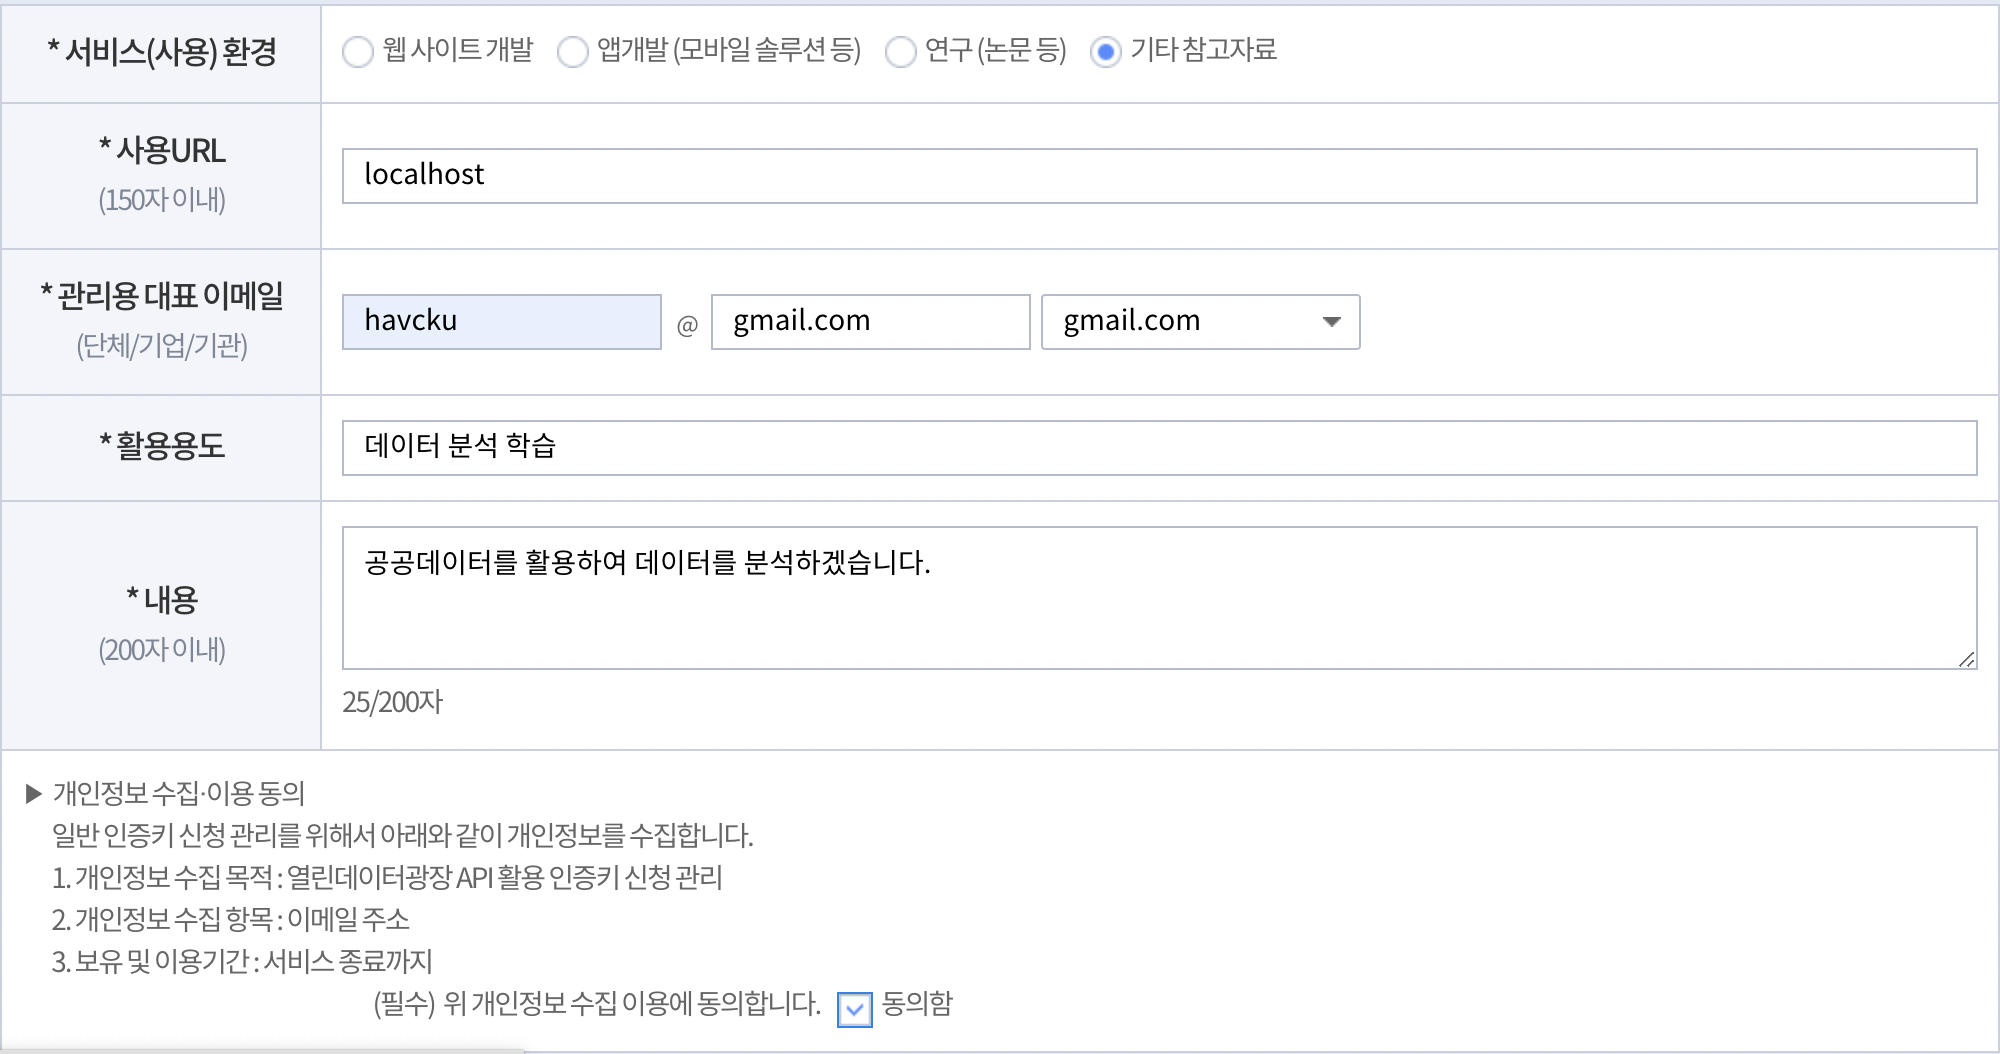

API활용 가이드 숙지
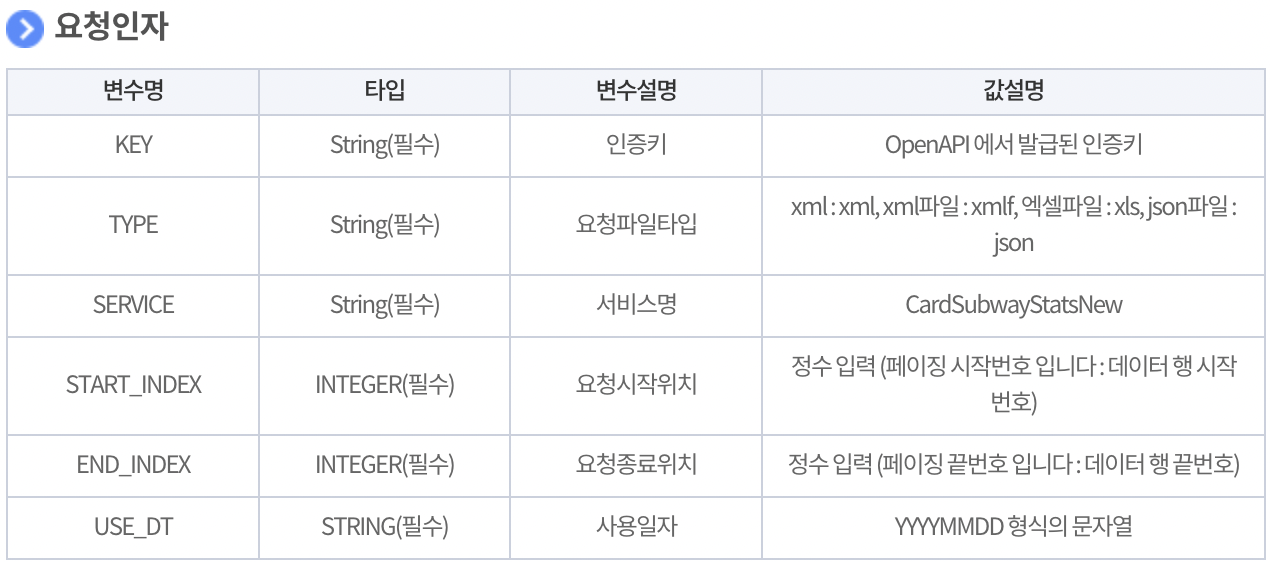
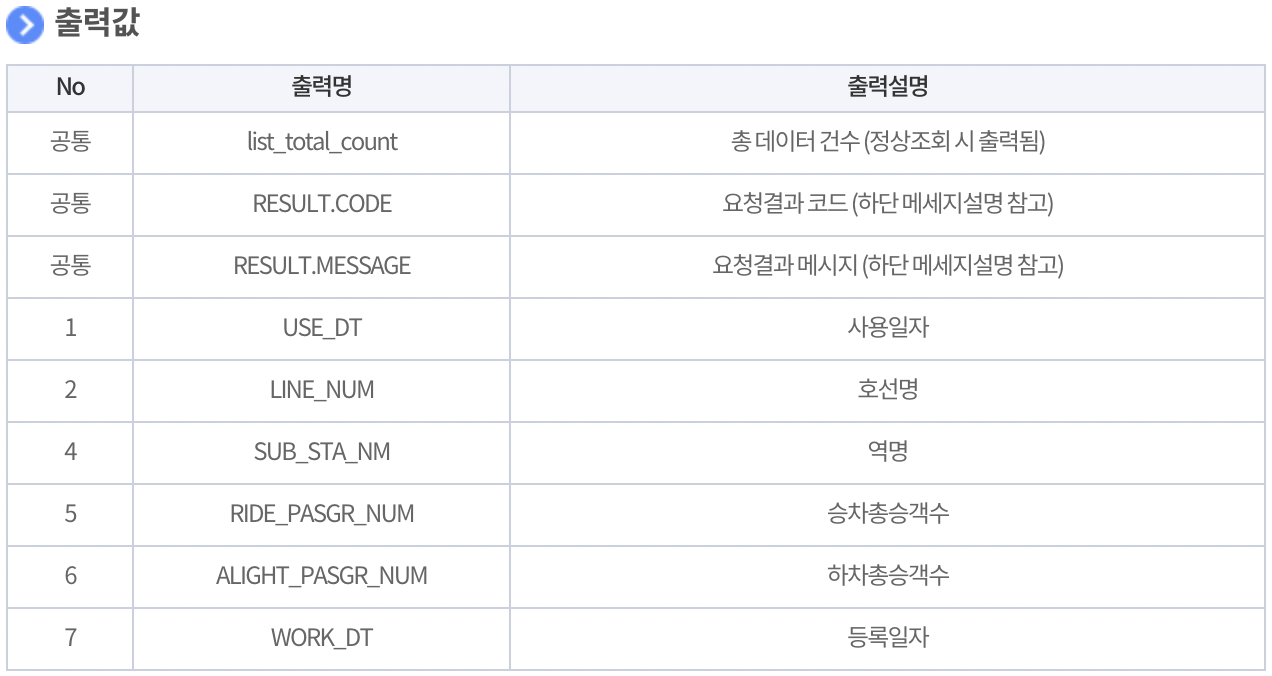

######데이터 추출(지역코드, 요청변수, Beautiful Soup 라이브러리 사용, 서비스키, URL)
open API로 데이터를 불러오기 위해 사용할 샘플코드와 라이브러리를 가져옵니다. 

#####[Python3 샘플 코드]
```
import requests

url = 'http://openapi.seoul.go.kr:8088/sample/xml/CardSubwayStatsNew/1/5/20220301'

response = requests.get(url)
print(response.content)
```

#####[미리보기 페이지]
샘플URL의 미리보기 페이지를 통해 API 서비스가 어떤 데이터 정보를 서비스하는지 알 수 있습니다. 

INFO-000 : 정상처리 되었습니다.
USE_DT : 사용일자
LINE_NUM : 호선명
SUB_STA_NM : 역명
RIDE_PASGR_NUM : 승차총승객수
ALIGHT_PASGR_NUM : 하차총승객수
WORK_DT : 등록일자

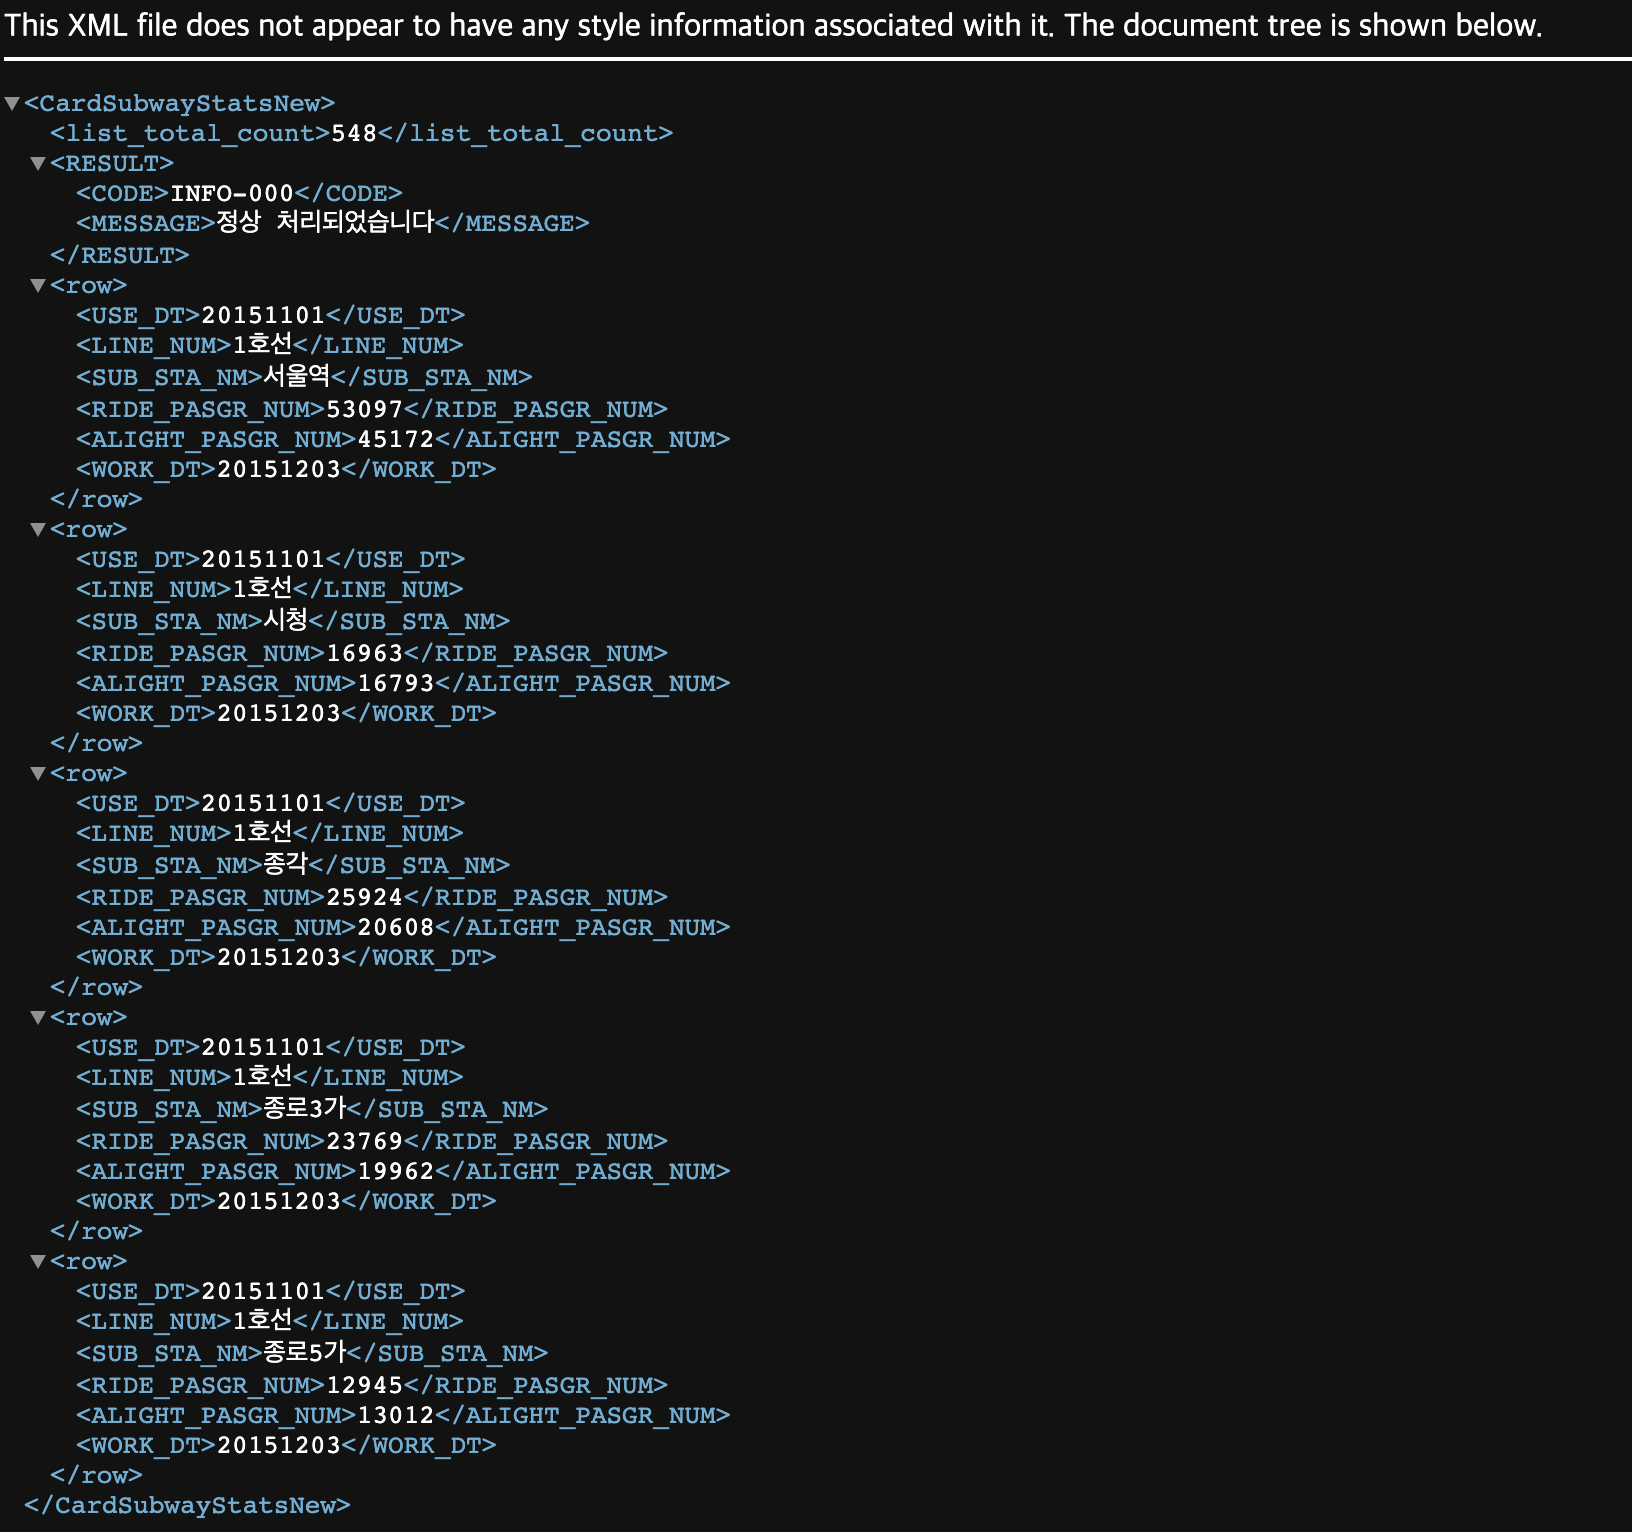




In [1]:
import urllib.request                                          #1
import json                                                    #2
import pandas as pd                                            #3

from bs4 import BeautifulSoup
from pandas.io.json import json_normalize                      #4 
from urllib.request import urlopen
url = "http://openapi.seoul.go.kr:8088/6555714d56686176313037554b534b48/json/CardSubwayStatsNew/1/1000/20230531"

response = urllib.request.urlopen(url) 
json_str = response.read().decode("utf-8")                     #5
json_object = json.loads(json_str)                             #6
df=pd.json_normalize(json_object['CardSubwayStatsNew']['row'])

1 : `imort urllib.request`는 URL이나 HTTP를 여는 데 도움이 되는 함수와 클래스를 정의합니다.   즉, urlib.request를 사용하면 간단하게 웹 페이지 요청 및 데이터를 가져오는 것이 가능합니다.  
2 : `import json`은 JavaScript Object Notation의 약자로서 데이터를 문자열의 형태로 나타내기 위해서 사용됩니다.  JSON은 원래 자바스크립트에서 파생되었지만 현재는 프로그래밍 언어와 무관하게 거의 표준으로 자리잡아 특히 이종의 시스템 간에 원격으로 데이터를 주고 받을 때 많이 사용되고 있습니다.  
3 : `import pandas as pd`는 파이썬에서 사용하는 데이터분석 라이브러리로, 행과 열로 이루어진 데이터 객체를 만들어 다룰 수 있게 되며 보다 안정적으로 대용량의 데이터들을 처리하는데 매우 편리한 도구 입니다.  
4 : `from pandas.io.json import json_normalize`은 1개의 key에 여러 개의 값이 dictionary 형태로 들어갈 수도 있고, list 형태로 포함될 수 있습니다.  이런 경우에는 `pandas.io.json`을 활용해서 `JSON` 파일을 불러오는 것이 좋습니다.  
5 : url을 불러오고 이것의 인코딩을 utf-8로 전환하여 결과를 받습니다.  


In [2]:
print(url)
html = urlopen(url)
bs_obj = BeautifulSoup(html, "html.parser")
print(bs_obj)

http://openapi.seoul.go.kr:8088/6555714d56686176313037554b534b48/json/CardSubwayStatsNew/1/1000/20230531
{"CardSubwayStatsNew":{"list_total_count":608,"RESULT":{"CODE":"INFO-000","MESSAGE":"정상 처리되었습니다"},"row":[{"USE_DT":"20230531","LINE_NUM":"1호선","SUB_STA_NM":"서울역","RIDE_PASGR_NUM":54953.0,"ALIGHT_PASGR_NUM":52227.0,"WORK_DT":"20230603"},{"USE_DT":"20230531","LINE_NUM":"1호선","SUB_STA_NM":"시청","RIDE_PASGR_NUM":33918.0,"ALIGHT_PASGR_NUM":30936.0,"WORK_DT":"20230603"},{"USE_DT":"20230531","LINE_NUM":"1호선","SUB_STA_NM":"종각","RIDE_PASGR_NUM":45069.0,"ALIGHT_PASGR_NUM":44091.0,"WORK_DT":"20230603"},{"USE_DT":"20230531","LINE_NUM":"1호선","SUB_STA_NM":"종로3가","RIDE_PASGR_NUM":28657.0,"ALIGHT_PASGR_NUM":25475.0,"WORK_DT":"20230603"},{"USE_DT":"20230531","LINE_NUM":"1호선","SUB_STA_NM":"종로5가","RIDE_PASGR_NUM":26082.0,"ALIGHT_PASGR_NUM":25610.0,"WORK_DT":"20230603"},{"USE_DT":"20230531","LINE_NUM":"1호선","SUB_STA_NM":"동대문","RIDE_PASGR_NUM":12148.0,"ALIGHT_PASGR_NUM":11645.0,"WORK_DT":"20230603"},{"US

```
print(url)
```
완성된 url을 직접 브라우저 주소표시줄에 확인 할 수 있습니다.  

```
html = urlopen(url)
bs_obj = BeautifulSoup(html, "html.parser")
print(bs_obj)
```
urlopen 함수를 이용해 url을 오픈해 웹페이지를 불러옵니다.  
BeautifulSoup을 이용해 변수 html을 파싱한 후 객체로 저장합니다.   

In [3]:
json_object = json.loads(json_str)                             #6
df=pd.json_normalize(json_object['CardSubwayStatsNew']['row']) #7

6 : 받은 데이터가 문자열이라서 이를 json으로 변환합니다.  
7 : 필요한 데이터는 ‘CardSubwayStatsNew'의 하위에 있는 ‘row'에 있음을 확인할 수 있습니다.  이제 row에 해당하는 데이터를 데이터프레임으로 불러옵니다.

In [4]:
df

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20230531,1호선,서울역,54953.0,52227.0,20230603
1,20230531,1호선,시청,33918.0,30936.0,20230603
2,20230531,1호선,종각,45069.0,44091.0,20230603
3,20230531,1호선,종로3가,28657.0,25475.0,20230603
4,20230531,1호선,종로5가,26082.0,25610.0,20230603
...,...,...,...,...,...,...
603,20230531,중앙선,오빈,339.0,353.0,20230603
604,20230531,중앙선,양평,3106.0,3209.0,20230603
605,20230531,중앙선,원덕,412.0,390.0,20230603
606,20230531,중앙선,용문,2083.0,1991.0,20230603


###데이터 변환(데이터를 리스트 데이터로 변환, 한글처리) *numpy 라이브러리

추출한 데이터를 리스트 데이터로 바꾸겠습니다.

1) [사용일자, 승차총객수, 하차총객수] 

In [5]:
#2023년 5월 1일부터 2023년 5월 31까지 데이터를 불러옵니다.
dt_index = pd.date_range(start='20230501', end='20230531')
dt_index
#지하철 총객수의 변화를 보기 위해서는 시계열을 살펴봐야 합니다.  
#하루치 데이터를 데이터 프레임으로 불러오고, 이것을 원하는 기간에 저장하도록 하겠습니다.

DatetimeIndex(['2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04',
               '2023-05-05', '2023-05-06', '2023-05-07', '2023-05-08',
               '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12',
               '2023-05-13', '2023-05-14', '2023-05-15', '2023-05-16',
               '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-20',
               '2023-05-21', '2023-05-22', '2023-05-23', '2023-05-24',
               '2023-05-25', '2023-05-26', '2023-05-27', '2023-05-28',
               '2023-05-29', '2023-05-30', '2023-05-31'],
              dtype='datetime64[ns]', freq='D')

In [6]:
#데이터를 리스트로 바꿉니다.
dt_list = dt_index.strftime("%Y%m%d").tolist()
dt_list

['20230501',
 '20230502',
 '20230503',
 '20230504',
 '20230505',
 '20230506',
 '20230507',
 '20230508',
 '20230509',
 '20230510',
 '20230511',
 '20230512',
 '20230513',
 '20230514',
 '20230515',
 '20230516',
 '20230517',
 '20230518',
 '20230519',
 '20230520',
 '20230521',
 '20230522',
 '20230523',
 '20230524',
 '20230525',
 '20230526',
 '20230527',
 '20230528',
 '20230529',
 '20230530',
 '20230531']

In [7]:
dt_index = pd.date_range(start='20230501', end='20230531')
dt_list = dt_index.strftime("%Y%m%d").tolist()

for i in dt_list:
    url="http://openapi.seoul.go.kr:8088/6555714d56686176313037554b534b48/json/CardSubwayStatsNew/1/1000/" + i
    response = urllib.request.urlopen(url) 
    json_str = response.read().decode("utf-8")
    json_object = json.loads(json_str)
    df_temp=pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
    df=df.append(df_temp)    
# for 문으로 하루치 데이터 부르는 작업을 리스트에 저장된 기간에 반복한다.
# url을 바꿔가면서 데이터를 부르기 위해서 url의 끝부문 날짜에 변수 i를 넣어준다.

<ipython-input-7-28b0df8ca1bd>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp)
<ipython-input-7-28b0df8ca1bd>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp)
<ipython-input-7-28b0df8ca1bd>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp)
<ipython-input-7-28b0df8ca1bd>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp)
<ipython-input-7-28b0df8ca1bd>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df_temp)
<ipython-input-7-28b0df8ca1bd>:10: Futur

In [8]:
df

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20230531,1호선,서울역,54953.0,52227.0,20230603
1,20230531,1호선,시청,33918.0,30936.0,20230603
2,20230531,1호선,종각,45069.0,44091.0,20230603
3,20230531,1호선,종로3가,28657.0,25475.0,20230603
4,20230531,1호선,종로5가,26082.0,25610.0,20230603
...,...,...,...,...,...,...
603,20230531,중앙선,오빈,339.0,353.0,20230603
604,20230531,중앙선,양평,3106.0,3209.0,20230603
605,20230531,중앙선,원덕,412.0,390.0,20230603
606,20230531,중앙선,용문,2083.0,1991.0,20230603


이렇게, 1달간의 쌓인 데이터가 607행임을 알 수 있습니다.  
5월 하루 동안 지하철 이용 객수를 구하기 위해서 하루치 인원의 합을 데이터 프레임에 저장해 보겠습니다. 

###한글처리

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus']=False

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [10]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'NanumGothic'
plt.figure(figsize=(16,8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

In [11]:
from matplotlib import font_manager, rc
font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

####데이터 적재(데이터 프레임 생성, Pandas 라이브러리 사용, 리스트 데이터를 데이터 프레임에 저장)  

In [12]:
dt_index = pd.date_range(start='20230501', end='20230531')
dt_list = dt_index.strftime("%Y%m%d").tolist()
df = pd.DataFrame({'DATE':[], 'RIDE':[],})
j=1
for i in dt_list:
    url="http://openapi.seoul.go.kr:8088/6555714d56686176313037554b534b48/json/CardSubwayStatsNew/1/1000/" + i
    response = urllib.request.urlopen(url) 
    json_str = response.read().decode("utf-8")
    json_object = json.loads(json_str)
    pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
    df_temp=pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
    df.loc[j] = [i, df_temp['RIDE_PASGR_NUM'].sum(),]
    print(i,j)
    j=j+1

20230501 1
20230502 2
20230503 3
20230504 4
20230505 5
20230506 6
20230507 7
20230508 8
20230509 9
20230510 10
20230511 11
20230512 12
20230513 13
20230514 14
20230515 15
20230516 16
20230517 17
20230518 18
20230519 19
20230520 20
20230521 21
20230522 22
20230523 23
20230524 24
20230525 25
20230526 26
20230527 27
20230528 28
20230529 29
20230530 30
20230531 31


In [13]:
#1
df_temp['RIDE_PASGR_NUM'].sum()
#2
df.loc[j] = [i, df_temp['RIDE_PASGR_NUM'].sum()]
#3
df = pd.DataFrame({'LINE' : [], 'DATE':[], 'RIDE':[]})

In [14]:
df

,LINE,DATE,RIDE


In [15]:
dt_index = pd.date_range(start='20230501', end='20230531')
dt_list = dt_index.strftime("%Y%m%d").tolist()
df = pd.DataFrame({'DATE':[], 'RIDE':[],})
j=1
for i in dt_list:
    url="http://openapi.seoul.go.kr:8088/6555714d56686176313037554b534b48/json/CardSubwayStatsNew/1/1000/" + i
    response = urllib.request.urlopen(url) 
    json_str = response.read().decode("utf-8")
    json_object = json.loads(json_str)
    pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
    df_temp=pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
    df.loc[j] = [i, df_temp['RIDE_PASGR_NUM'].sum()]
    print(i,j)
    j=j+1

20230501 1
20230502 2
20230503 3
20230504 4
20230505 5
20230506 6
20230507 7
20230508 8
20230509 9
20230510 10
20230511 11
20230512 12
20230513 13
20230514 14
20230515 15
20230516 16
20230517 17
20230518 18
20230519 19
20230520 20
20230521 21
20230522 22
20230523 23
20230524 24
20230525 25
20230526 26
20230527 27
20230528 28
20230529 29
20230530 30
20230531 31


####데이터 시각화(Matplotlib 라이브러리 사용) 
1. 2023년 5월 서울시 지하철 승차 인원 일별 분석  
2. 승하차 승객 수 TOP 10 시각화

Text(0.5, 1.0, '2023년 5월 서울시 지하철 승차 인원 일별 분석')

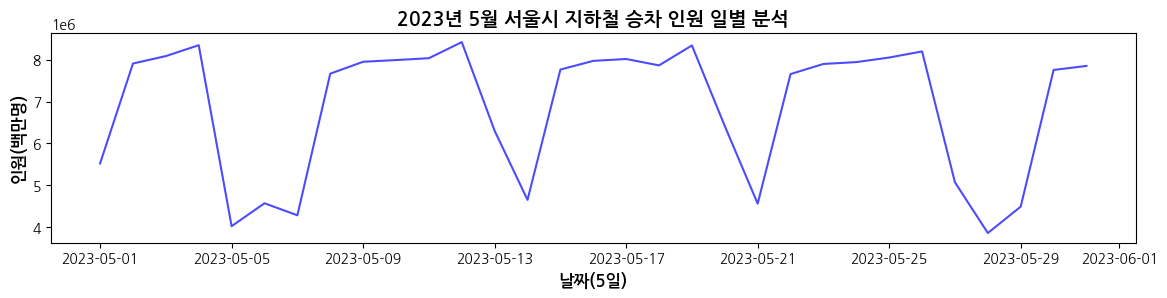

In [16]:
import matplotlib.pyplot as plt
df['DATE']=pd.to_datetime(df['DATE'])
df['RIDE'] = pd.to_numeric(df['RIDE'], downcast='float')

fig = plt.figure(figsize=(14,6))
ax = plt.subplot(2,1,1)

ax.plot(df['DATE'],df['RIDE'],color='b',lw=1.5,alpha=0.7)
ax.set_ylabel('인원(백만명)', fontweight='bold', fontsize=12)
ax.set_xlabel('날짜(5일)', fontweight='bold', fontsize=12)
ax.set_title('2023년 5월 서울시 지하철 승차 인원 일별 분석', fontweight = 'bold',fontsize = 14)